# Sklearn Random Forest Regression for seasonal selections

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [3]:
from sklearn.ensemble import RandomForestRegressor as rfr
from random import randint
#model_data_name

n_est = randint(20, 300)
maxd = None #randint(1, 10)
maxd = randint(1, 10)
m_feat = 'log2'
m_feat = None
rfrModel_1 = rfr(n_estimators=n_est, max_features=m_feat, max_depth = maxd)#, max_depth={maxd}) #, oob_score=True,  max_depth={maxd}) #, min_samples_split=1.0,n_jobs=-1) 
mdl = "rf"
print(rfrModel_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=298,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [4]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
#from sklearn.ensemble import RandomForestRegressor as rfr
#from sklearn.ensemble import ExtraTreesRegressor as etr
#from sklearn.ensemble import GradientBoostingRegressor as gbr
#from sklearn.ensemble import AdaBoostRegressor as abr
#from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

ModuleNotFoundError: No module named 'pickle5'

In [5]:
def metrics(x, y):
    
    from sklearn import metrics
    try:
        ev = metrics.explained_variance_score(x, y)
    except:
        ev = np.nan
    print("Ev score: ", ev)
    
    try:
        me = metrics.max_error(x, y)
    except:
        me = np.nan
    print("Maximum Error: ", me)
    
    try:
        mae = metrics.mean_absolute_error(x, y)
    except:
        mae = np.nan
    print("Mean Absolute Error: ", mae)
    
    try:
        mse = metrics.mean_squared_error(x, y)
    except:
        mse = np.nan
    print("Mean Squared Error: ", mse)
    
    try:
        rmse = metrics.mean_squared_error(x, y, squared=False)
    except:
        rmse =  np.nan
    print("Root Mean Squared Error: ", rmse)
    
    try:
        msle = metrics.mean_squared_log_error(x, y)
    except:
        msle = np.nan
    print("Mean Squared Log Error: ", msle)
   
    try:
        rmsle = metrics.mean_squared_log_error(x, y, squared = False)
    except:
        rmsle =  np.nan
    print("Root Mean Squared Log Error : ", rmsle)
    
    try:
        mape = metrics.mean_absolute_percentage_error(x, y)
    except:
        mape = np.nan
    print("Mean Absolute Percentage Error: ", mape)
    
    try:
        medae = metrics.median_absolute_error(x, y)
    except:
        medae = np.nan
    print("Median Absolute Error: ", medae)
    
    try:
        r2 = metrics.r2_score(x, y)
    except:
        r2 = np.nan
    print("Coefficient of determination: ", r2)
    
    try:
        bias = bias = np.mean(x) - np.mean(y)
    except:
        bias = np.nan
    print("Bias: ", bias)
    
    n = len(x)
    print("n: ", n)
    
    return ev, me, mae, mse, rmse, msle, rmsle, mape, medae, r2, bias, n


In [6]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
date_str = now.strftime("%Y%m%d")
date_time_str = now.strftime("%Y%m%d_%H%M%S")
print(date_str)
print(date_time_str)

20240309
20240309_100356


### Import data

In [5]:
data_date = "20230201"
drive = "D"

# define output directory
output_dir = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date_str)

# model csv outputs
output_ml_csv = r"{0}:\cdu\data\ml_outputs".format(drive)

# data dir
dir_ = r"{0}:\cdu\data\zonal_stats\output\{1}\ml_data_si_dir".format(drive, data_date)

index_ = 0

In [6]:
def mk_dir_fn(dir_):
    """ Create a new directory if one does not already exist. """
    print(dir_)
    if not os.path.isdir(dir_):
        os.mkdir(dir_)

        
def export_csv_fn(list_, dir_, file_name):
    
    """ Create and export path from directory and file name and exports csv with no dropping the index column. """
    
    df_final = pd.concat(list_, axis =0)    
    output_path = os.path.join(dir_, file_name)
    df_final.to_csv(os.path.join(output_path), index=False)
    print("File output to: ", output_path)
    
    return df_final

## Set output file locations

In [7]:
ml_reg_dir= os.path.join(output_dir, "ml_reg_dir")
plots_dir = os.path.join(ml_reg_dir, "ml_reg_plots_dir")
all_plots_dir = os.path.join(plots_dir, "all")
no_tern_plots_dir = os.path.join(plots_dir, "no_tern")
mk_dir_fn(output_dir)
mk_dir_fn(ml_reg_dir)
mk_dir_fn(plots_dir)
mk_dir_fn(all_plots_dir)
mk_dir_fn(no_tern_plots_dir)

D:\cdu\data\zonal_stats\output\20230215
D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir
D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir
D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all
D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\no_tern


## Load data

In [8]:
dir_

'D:\\cdu\\data\\zonal_stats\\output\\20230201\\ml_data_si_dir'

In [9]:
file_list = []
for f in glob(os.path.join(dir_, "*reg.csv")):
    print(f)
    file_list.append(f)

D:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\season_climate_fillna_mean_fms_NOT_si_reg.csv
D:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\r2_best_season_climate_fillna_fms_NOT_si_reg.csv
D:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\season_NO_climate_fillna_mean_fms_NOT_si_reg.csv
D:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\r2_best_season_NO_climate_fillna_fms_NOT_si_reg.csv


In [10]:
df = pd.read_csv(file_list[index_], header=0)

In [11]:
df

,target,site,uid,date,bio_agb_kg1ha,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,nt001,119,20110523,0.00,13.78,47.00,25.85,23.87,8.48,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,barkely01,42,20111025,0.00,0.75,2.87,1.69,1.49,0.70,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,barkely02,43,20111026,0.00,2.12,13.78,4.97,4.73,2.43,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
3,0.00,barkely04,45,20111026,0.00,2.12,6.42,4.37,4.47,1.22,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
4,0.00,barkely03,44,20111026,0.00,0.75,3.29,1.82,1.64,0.70,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20805.22,ntadac0002,5,20160506,20805.22,15.54,42.39,29.12,29.27,6.84,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,ntaarp0001,1,20160602,30472.45,27.61,38.92,34.75,34.33,3.24,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,ntaarp0002,2,20160602,24414.13,9.06,22.31,14.40,14.21,3.60,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,17598.35,ntaarp0003,3,20160603,17598.35,5.26,25.45,13.08,12.11,5.79,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


In [12]:
df.shape

(167, 180)

In [13]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [14]:
df2 = df.copy(deep=True)

In [15]:
print(list(df2.columns))

['target', 'site', 'uid', 'date', 'bio_agb_kg1ha', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1

### Set variables to plot

In [16]:
# # predicted value is x
# value_x = 'bio_agb_kg1ha'
# # variable is y
# value_y = "b1_h99a_01122_mean"
# value_a = 'date'
# value_b = 'b1_fpca2_0509_mean'


In [17]:
# value_y

In [18]:
# df2.shape

In [19]:
def save_fig(value_x, value_y, value_a, value_b, out_file):
    # Output to file
    output_file(out_file, 
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))



    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site'),
                ('Date', '@date'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [20]:
# save_fig(value_x, value_y)

In [21]:
# column_list

In [22]:
column_list = df2.columns.to_list()
y_list = column_list[5:]
value_x = column_list[:1][0]

value_a = 'date'
value_b = 'b1_fpca2_0509_mean'


for i in y_list:
    value_y = i
    
    out_file = os.path.join(all_plots_dir,'all_sites_{0}_{1}.html'.format(value_x, value_y))
    print(f"Plot exported to: {out_file}")
    save_fig(value_x, value_y, value_a, value_b, out_file)
    

Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_fpca2_0509_min.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_fpca2_0509_max.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_fpca2_0509_mean.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_fpca2_0509_med.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_fpca2_0509_std.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_h99a_01122_min.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_h99a_01122_max.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all

Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_dp1_0509_med.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dp1_0509_min.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dp1_0509_max.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dp1_0509_mean.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dp1_0509_std.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dp1_0509_med.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dp1_0509_min.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_tar

Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dim_1202_std.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dim_1202_min.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dim_1202_max.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dim_1202_mean.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dim_1202_med.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dim_1202_std.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_rain_d_mean.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_

### Drop AGB numbers which are high

In [23]:
# # drop the 7 tern sites that apear to be outliers
# df3 =df2[df2[value_x] <= 100000]
# df3.to_csv(os.path.join(output_dir, "{0}_lt_100000.csv".format(value_x)))
# drop_sites =df2[df2[value_x] > 100000]
# drop_sites.value_counts(['site', value_x, value_y])


In [24]:
# df3.shape

In [25]:

# # Output to file
# output_file(os.path.join(output_, 'TERN7_removed_sites_{0}_{1}.html'.format(value_x, value_y)),
#             title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


# #Specify the selection tools to be made available
# select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# # Format the tooltip
# tooltips = [
#             ('Site', '@site'),
#             ('Date', '@date'),
#             (value_x, '@{0}'.format(value_x)),
#             (value_y, '@{0}'.format(value_y)),
#             (value_a, '@{0}'.format(value_a)),
#             (value_b, '@{0}'.format(value_b)) 
#            ]

# # Create the figure
# fig = figure(plot_height=400,
#              plot_width=1500,
#              y_axis_label= value_y.replace("_", " "), 
#              x_axis_label= value_x.replace("_", " "),
#              title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
#              toolbar_location='below',
#              tools=select_tools)

# # # Format the y-axis tick label
# fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# # Add square representing each site
# fig.square(x= value_x,
#            y= value_y,
#            source=df3,
#            size=5,
#            color='royalblue',
#            selection_color='deepskyblue',
#            nonselection_color='lightgray',
#            nonselection_alpha=0.3)

# # Add the HoverTool to the figure
# fig.add_tools(HoverTool(tooltips=tooltips))

# # Visualize
# show(fig)

## Choose which data set to run the models from

In [26]:
df_ml = df2
df_ml = df

In [27]:
print(list(df_ml.columns))

['target', 'site', 'uid', 'date', 'bio_agb_kg1ha', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1

In [28]:
# drop some of the unwanted values
df_ml.drop(['site', 'uid', 'date', 'bio_agb_kg1ha'], axis=1, inplace=True) # 'date',
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [29]:
print(list(df_ml))

['target', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1_0112_std', 'b1_dp1_0112_med', 'b2_dp1_0

In [30]:
df_ml.shape

(167, 176)

In [31]:
df_ml.head(5)

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,13.78,47.00,25.85,23.87,8.48,7.27,11.78,9.24,8.86,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,0.75,2.87,1.69,1.49,0.70,4.38,8.97,6.83,7.18,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,2.12,13.78,4.97,4.73,2.43,3.13,5.82,4.55,4.43,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
3,0.00,2.12,6.42,4.37,4.47,1.22,5.93,8.85,7.68,7.68,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
4,0.00,0.75,3.29,1.82,1.64,0.70,3.66,7.09,4.98,4.85,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149


## Level of agb 0 values

In [32]:
model_data_ = df_ml
model_data_name = "all_values"


model_data_ = df_ml[df_ml['target']>0.0]
model_data_name = "no0_values"


# ## Select a randon number of 0 values
# n = 3
# agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# model_data_name = f"s{n}_0_values"


model_outputs = os.path.join(ml_reg_dir, f"{model_data_name}")
mk_dir_fn(model_outputs)

print(model_outputs)
print(model_data_.shape)

# define model output name for all outputs
str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_m_feat_{m_feat}_m_depth_{maxd}_{date_time_str}"

D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\no0_values
D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\no0_values
(110, 176)


In [33]:
model_data_.dropna(inplace=True)
print(model_data_.shape)

(110, 176)


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [34]:
model_data_

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
7,1894.20,1.79,5.83,2.86,2.48,1.22,3.80,5.20,4.29,4.27,...,-1452928,1452928,400174,-1264158,1238000,1250407,846000,1420098,2149390,2440148
8,1536.15,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2148760,2148760,-267789,-1724138,1148000,1156438,732000,1358238,2373541,2737539
9,1164.24,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2327297,2327297,176162,-1318945,1571000,1235708,877000,1377054,1926203,2153802
10,4736.01,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2063673,2063673,799162,-701031,1106000,1197360,743000,1417038,2593368,3039489
12,1549.09,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-1639267,1639267,1618314,-88940,1673000,2020530,1324000,2256305,3482378,4382641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20805.22,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,17598.35,5.26,25.45,13.08,12.11,5.79,9.61,20.05,13.89,13.26,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


## Split off unseen data 

In [35]:

# Creating a dataframe with 20%
# values of original dataframe
unseen_data = model_data_.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = model_data_.drop(unseen_data.index)


In [36]:
unseen_data

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
142,7478.59,1.21,4.22,3.26,3.29,0.89,8.34,12.98,10.63,10.56,...,-1979434,1979434,615672,-1104742,1083000,1277097,775000,1521796,2936718,3533459
149,10544.60,4.73,36.62,25.05,25.99,10.21,17.54,20.11,18.86,18.83,...,-1099099,1099099,3627293,259268,1623000,2574788,1501000,2911548,5492133,8538307
152,5117.80,2.87,16.45,11.03,12.11,4.35,8.13,13.23,11.44,11.78,...,-2024327,2024327,838941,-1171204,1498000,1554511,1032000,1759091,2715789,3212361
79,10273.34,5.83,25.45,9.86,8.71,4.08,4.85,16.43,11.30,11.33,...,-1779141,1779141,1049817,-1183472,1360000,1814858,1099000,2106171,3887513,5073124
64,665.28,20.29,37.77,29.90,30.38,4.55,7.44,12.23,9.75,9.73,...,-1347647,1347647,1068013,-1358639,1136000,1308150,841000,1515315,2529323,2950420
166,9995.51,19.30,40.08,30.47,32.06,6.23,12.00,18.40,16.60,17.50,...,770925,-770925,5614599,2339640,2185000,3960474,2255000,4179538,7290656,15262347
29,3742.20,6.42,13.78,8.50,7.68,1.71,3.83,6.74,5.15,5.20,...,-2331878,2331878,1621462,-1355263,1532000,2144527,1265000,2471669,4725439,6708635
38,5588.14,6.42,19.30,12.69,13.36,4.06,9.25,12.71,11.28,11.43,...,-2096886,2096886,1261760,-1039190,1464000,1909454,1161000,2201922,3991062,5259015
156,2824.46,13.78,32.06,21.59,21.29,4.81,15.43,18.84,17.10,16.98,...,-1595960,1595960,3713984,801582,1970000,2797247,1733000,3074512,5015919,7357350
22,1921.00,3.29,8.36,4.91,4.22,1.36,4.60,8.72,6.25,6.14,...,-1985617,1985617,289170,-1094389,1719000,1789944,1222000,1987638,2894363,3470956


In [37]:
model_data

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
8,1536.15,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2148760,2148760,-267789,-1724138,1148000,1156438,732000,1358238,2373541,2737539
9,1164.24,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2327297,2327297,176162,-1318945,1571000,1235708,877000,1377054,1926203,2153802
12,1549.09,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-1639267,1639267,1618314,-88940,1673000,2020530,1324000,2256305,3482378,4382641
17,1947.59,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2027067,2027067,-375297,-1382390,1684000,1351286,995000,1480214,1957505,2193402
19,2540.85,2.87,14.65,5.36,4.22,2.92,3.66,6.86,5.56,5.73,...,-2277228,2277228,1108429,-830289,1825000,1864126,1273000,2064548,2995999,3621713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,16375.18,19.30,27.61,23.58,23.34,2.53,15.64,19.64,18.24,18.35,...,-1222031,1222031,3647779,881563,1718000,2675640,1576000,3000000,5472222,8485610
162,20805.22,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733


# Scatter plots with error

In [38]:
# for i in model_data.columns[1:]:
#     print(i)
#     value_x = 'target'
#     value_y_loop = str(i)
#     plt.figure(figsize=(10,4))
#     # left plot
#     plt.subplot(1,2,1)
#     sns.regplot(model_data[value_x], model_data[value_y_loop], line_kws={"color":"red"})
#     plt.xlabel(value_x)
#     plt.ylabel(value_y_loop)
#     plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
#     slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(model_data[value_x], model_data[value_y_loop])

#     print('slope: {:.10f}'.format(slope))
#     print('intercept {:.10f}'.format(intercept))
#     print('r2: {:.10f}'.format(r_value))
#     print('P value: {:.10f}'.format(p_value))
#     print('std error: {:.10f}'.format(std_err))
    
#     # right plot
#     plt.subplot(1,2,2)
#     sns.regplot(model_data[value_x], model_data[value_y_loop], lowess=True, line_kws={"color":"green"})
#     plt.xlabel(value_x)
#     plt.ylabel("Error")
#     plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
#     plt.tight_layout()
#     plt.show()
    


In [39]:
# # value_x = 'bio_agb_kg1ha'
# # value_y = 'b2_dbi_mean'
# sns.regplot(x= value_x, y=value_y, data=df)
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

# print("slope: ", slope)
# print("intersept: ", intercept)
# print("r2: ", r_value)
# print("P_value: ", p_value)
# print("std error: ", std_err)

In [40]:
# # value_x = 'bio_agb_kg1ha'
# # value_y = 'b3_dbi_mean'
# sns.scatterplot(x= value_x, y=value_y, data=df)
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

# print("slope: ", slope)
# print("intersept: ", intercept)
# print("r2: ", r_value)
# print("P_value: ", p_value)
# print("std error: ", std_err)

In [41]:
# randomly split data into train and test datasets, the user needs to define the variables 

# Two example of how you can call the predictor variables 

#xdata1 = df4[df4.columns[12:]].astype('float32')

#xdata1 = df[['psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa', 'RIa', 'NBRa', 'NDIIa', 'GDVIa', 'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa', 'MSRa', 'psB2d', 'psB3d', 'psB4d', 'psB5d', 'psB6d', 'ratio32d', 'ratio42d', 'ratio43d', 'ratio52d', 'ratio53d', 'ratio54d', 'ratio62d', 'ratio63d', 'ratio64d', 'ratio65d', 'GSAVId', 'GNDVId', 'CVId', 'NDGId', 'RId', 'NBRd', 'NDIId', 'GDVId', 'MSAVId', 'DVId', 'SAVId', 'NDVId', 'MSRd']].astype('float32')
#xdata1 = df[['psB1a', 'psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32fa', 'ratio42fa', 'ratio43fa', 'ratio52fa', 'ratio53fa', 'ratio54fa', 'ratio62fa', 'ratio63fa', 'ratio64fa', 'ratio65fa', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIfa', 'GSAVIa', 'GNDVIfa', 'GNDVIa', 'CVIfa', 'CVIa', 'NDGIfa', 'NDGIa', 'RIfa', 'RIa', 'NBRfa', 'NBRa', 'NDIIfa', 'NDIIa', 'GDVIfa', 'GDVIa', 'MSAVIfa', 'MSAVIa', 'DVIfa', 'DVIa', 'SAVIfa', 'SAVIa', 'NDVIfa', 'NDVIa', 'MSRfa', 'MSRa']]
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(61, 175) (61,)
(27, 175) (27,)


### Plot up Histograms of Lidar meanCHM for train and test datasets

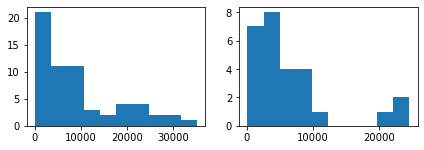

In [42]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [43]:
# rng = np.random.RandomState(1)
# rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
# rfrModel_1

In [44]:
# rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
# rfrModel_1

In [45]:
# n_est = 300
# rs = 1
# maxd = 4

# rng = np.random.RandomState(rs)
# rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
# print(rfrModel_1)
# mdl = "abr"
# str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
# print(str_model)

In [46]:
# from random import randint 
# x = randint(1, 100)
# n_est = randint(1, 100)
# lr= randint(1, 10)/10
# rs = randint(1, 10)
# maxd = randint(1, 10)
# loss = 'squared_error'

# rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
# print(rfrModel_1)
# mdl = "gbr"
# str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_lr_{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
# print(str_model)

In [47]:
# n_est = randint(20, 300)
# maxd = None #randint(1, 10)
# maxd = randint(1, 10)
# m_feat = 'log2'
# m_feat = None
# rfrModel_1 = rfr(n_estimators=n_est, max_features=m_feat, max_depth = maxd)#, max_depth={maxd}) #, oob_score=True,  max_depth={maxd}) #, min_samples_split=1.0,n_jobs=-1) 
# mdl = "rf"
# print(rfrModel_1)
# str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_m_feat_{m_feat}_m_depth_{maxd}_{date_time_str}"
# print(str_model)

In [48]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [49]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1


In [50]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [51]:
np.nan_to_num(X_1)

array([[7.6833544e+00, 2.1289408e+01, 1.4136019e+01, ..., 1.7744050e+06,
        3.4216500e+06, 4.2838240e+06],
       [6.8033609e+00, 1.7199116e+01, 1.1248076e+01, ..., 1.3770540e+06,
        1.9262030e+06, 2.1538020e+06],
       [2.4818003e+00, 1.3779837e+01, 7.0610614e+00, ..., 1.9303250e+06,
        3.3855190e+06, 4.2255710e+06],
       ...,
       [2.8723061e+00, 1.4648533e+01, 5.3612161e+00, ..., 2.0645480e+06,
        2.9959990e+06, 3.6217130e+06],
       [9.7826777e+00, 2.2308666e+01, 1.5269497e+01, ..., 2.6326110e+06,
        4.1448800e+06, 5.5428890e+06],
       [1.1309701e+01, 2.2308666e+01, 1.7247610e+01, ..., 2.6816570e+06,
        4.6156280e+06, 6.4755990e+06]], dtype=float32)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [52]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Ev score:  0.9513397336758387
Maximum Error:  5405.498133867633
Mean Absolute Error:  1412.951289831238
Mean Squared Error:  3843861.4748022067
Root Mean Squared Error:  1960.5768219588354
Mean Squared Log Error:  0.24477382323479527
Root Mean Squared Log Error :  0.49474622104144994
Mean Absolute Percentage Error:  0.5600301295716201
Median Absolute Error:  1005.3260309396228
Coefficient of determination:  0.9512625397652639
Bias:  -78.02865347781699
n:  61
plot saved to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\no0_values\rf_no0_values_n_est_116_m_feat_None_m_depth_6_20230215_081915_training_plot.pdf


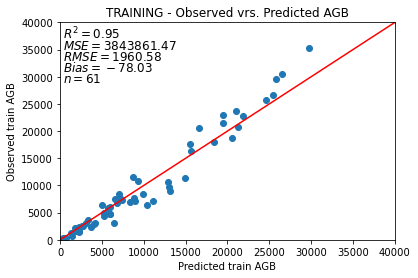

In [53]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
train_predict = rfrLCHM.predict(X_1)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))

train_ev, train_me, train_mae, train_mse, train_rmse, train_msle, train_rmsle, train_mape, train_medae, train_r2, \
train_bias, train_n = metrics(y_1, train_predict)

#plt.scatter(rfrLCHM.predict(X_1), y_1,) 
# print()
plt.scatter(train_predict, y_1)  
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)
#adding text inside the plot

plt.text(300, 37000, f'$R^2 = {round(train_r2, 2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(train_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(train_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(train_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {train_n}$', fontsize = 12)

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('TRAINING - Observed vrs. Predicted AGB')
plt.ylabel('Observed train AGB')
plt.xlabel('Predicted train AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')


plot_out = os.path.join(model_outputs, f'{str_model}_training_plot.pdf')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")
# runs +=1

plt.show()

Ev score:  -0.304920595863573
Maximum Error:  21450.794976250094
Mean Absolute Error:  4900.155444599913
Mean Squared Error:  57725133.1835897
Root Mean Squared Error:  7597.7057842212935
Mean Squared Log Error:  2.000135912648121
Root Mean Squared Log Error :  1.4142616139343247
Mean Absolute Percentage Error:  4.482723718378235
Median Absolute Error:  2173.357810650775
Coefficient of determination:  -0.30498374166872044
Bias:  52.872035203820815
n:  27


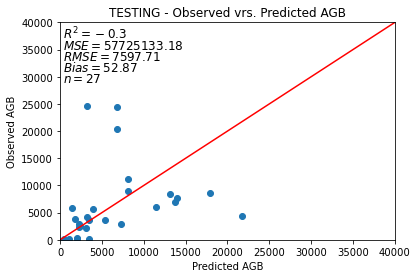

In [54]:
#y2_predict = rfrLCHM.predict(X_2)
test_predict = rfrLCHM.predict(X_2)
# print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
# print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
# print('RMSE =', format(np.sqrt(np.mean((test_predict - y_2) ** 2)), '.3f'))
# #print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
# print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
# print('n =' , len(y_2))


# r2 = round(rfrLCHM.score(X_2, y_2), 2)
# mse = round(np.mean((y_2 - rfrLCHM.predict(X_2))**2), 2)
# rmse = round(np.sqrt(np.mean((test_predict - y_2) ** 2)), 2)
# bias = round(np.mean(y_2) - np.mean(test_predict), 2)


test_ev, test_me, test_mae, test_mse, test_rmse, test_msle, test_rmsle, test_mape, \
test_medae, test_r2, test_bias, test_n = metrics(y_2, test_predict)


#plt.scatter(test_predict, y_2 ,s=10, c='b', marker='o')
plt.scatter(test_predict, y_2)# ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('TESTING - Observed vrs. Predicted AGB')
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {round(test_r2,2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(test_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(test_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(test_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {test_n}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_test_data.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

                 band                       n
168             NDIIm   9.947464015886132e-05
154          ratio43m   8.897678325044977e-05
135       rain_d_mean   8.493825938564481e-06
108   b1_dim_0911_med   8.468504205073978e-05
169             GDVIm   8.317943813997218e-05
..                ...                     ...
165             NDGIm  0.00014798759688414696
52   b2_dp1_0112_mean  0.00013336152073246507
141       evp_ml_mean  0.00013185361928784878
125   b2_dim_1202_min  0.00011530294425157662
131   b3_dim_1202_max  0.00011280162158859373

[175 rows x 2 columns]


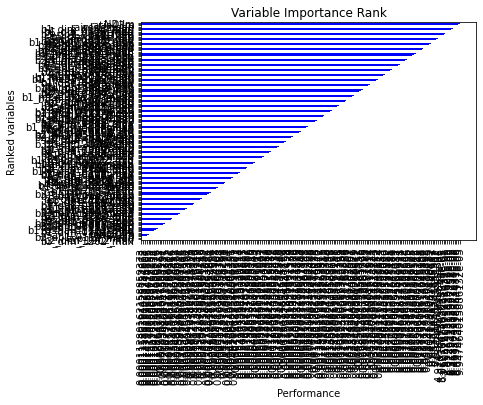

In [55]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')


plot_out = os.path.join(model_outputs, f'Band_Importance_Score_{str_model}.pdf')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

In [56]:
df_band.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    175 non-null    object
 1   n       175 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [57]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 168 to 131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    175 non-null    object
 1   n       175 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 168 to 131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    175 non-null    object 
 1   n       175 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [58]:
num_bf_selection = 0.005
nbfs = str(num_bf_selection)
num_bf_str = nbfs[2:]
df_var = dfsort[dfsort['n'] > num_bf_selection]

In [59]:
num_bf_str

'005'

In [60]:
col_features = df_var.band.tolist()
column_var = df_var.band.tolist()
col_features_n = df_var.n.tolist()

In [61]:
print(len(col_features))

28


In [62]:
#column_var = col_features
column_var.insert(0, 'target')

In [63]:
print(len(col_features))

28


In [64]:
df_var

,band,n
33,b5_dbi_0608_med,0.37
111,b2_dim_0911_max,0.06
6,b1_h99a_01122_max,0.05
15,b2_dbi_0608_min,0.04
32,b5_dbi_0608_mean,0.04
16,b2_dbi_0608_max,0.03
30,b5_dbi_0608_min,0.03
18,b2_dbi_0608_med,0.03
12,b1_dbi_0608_mean,0.02
110,b2_dim_0911_min,0.02


In [65]:
column_var

['target',
 'b5_dbi_0608_med',
 'b2_dim_0911_max',
 'b1_h99a_01122_max',
 'b2_dbi_0608_min',
 'b5_dbi_0608_mean',
 'b2_dbi_0608_max',
 'b5_dbi_0608_min',
 'b2_dbi_0608_med',
 'b1_dbi_0608_mean',
 'b2_dim_0911_min',
 'b2_dbi_0608_mean',
 'b1_fpca2_0509_min',
 'b1_dbi_0608_max',
 'b2_dim_0911_mean',
 'CVIm',
 'b1_dja_0305_max',
 'b2_dim_0608_mean',
 'b3_dbi_0608_med',
 'mslp_mean',
 'b2_dim_0608_min',
 'b6_dbi_0608_mean',
 'b3_dbi_0608_max',
 'ratio63m',
 'b3_dbi_0608_mean',
 'ratio64m',
 'b5_dbi_0608_max',
 'b2_dp1_0509_max',
 'b3_dbi_0608_min']

In [66]:
select_model_data = df_ml[column_var]

In [67]:
df_corr = select_model_data.corr()
df_corr.to_csv(os.path.join(model_outputs, f'selected_feature_{str_model}_feat_imp_n_{num_bf_str}.csv'))
df_corr

,target,b5_dbi_0608_med,b2_dim_0911_max,b1_h99a_01122_max,b2_dbi_0608_min,b5_dbi_0608_mean,b2_dbi_0608_max,b5_dbi_0608_min,b2_dbi_0608_med,b1_dbi_0608_mean,...,mslp_mean,b2_dim_0608_min,b6_dbi_0608_mean,b3_dbi_0608_max,ratio63m,b3_dbi_0608_mean,ratio64m,b5_dbi_0608_max,b2_dp1_0509_max,b3_dbi_0608_min
target,1.00,-0.64,0.67,0.65,-0.57,-0.63,-0.53,-0.64,-0.58,-0.54,...,-0.25,0.62,-0.62,-0.56,0.18,-0.61,-0.53,-0.56,0.64,-0.61
b5_dbi_0608_med,-0.64,1.00,-0.73,-0.74,0.82,1.00,0.84,0.97,0.85,0.77,...,0.21,-0.69,0.93,0.88,-0.32,0.90,0.59,0.96,-0.71,0.86
b2_dim_0911_max,0.67,-0.73,1.00,0.75,-0.72,-0.73,-0.68,-0.74,-0.73,-0.68,...,-0.37,0.81,-0.73,-0.73,0.40,-0.79,-0.59,-0.68,0.84,-0.78
b1_h99a_01122_max,0.65,-0.74,0.75,1.00,-0.70,-0.75,-0.66,-0.75,-0.70,-0.68,...,-0.31,0.72,-0.71,-0.68,0.28,-0.73,-0.55,-0.69,0.78,-0.73
b2_dbi_0608_min,-0.57,0.82,-0.72,-0.70,1.00,0.82,0.90,0.85,0.98,0.95,...,0.30,-0.66,0.79,0.87,-0.59,0.95,0.42,0.73,-0.75,0.98
b5_dbi_0608_mean,-0.63,1.00,-0.73,-0.75,0.82,1.00,0.84,0.97,0.85,0.77,...,0.21,-0.69,0.94,0.88,-0.32,0.90,0.59,0.97,-0.71,0.86
b2_dbi_0608_max,-0.53,0.84,-0.68,-0.66,0.90,0.84,1.00,0.79,0.97,0.94,...,0.28,-0.69,0.82,0.97,-0.55,0.94,0.45,0.84,-0.69,0.88
b5_dbi_0608_min,-0.64,0.97,-0.74,-0.75,0.85,0.97,0.79,1.00,0.84,0.78,...,0.23,-0.66,0.90,0.83,-0.35,0.89,0.56,0.90,-0.73,0.90
b2_dbi_0608_med,-0.58,0.85,-0.73,-0.70,0.98,0.85,0.97,0.84,1.00,0.97,...,0.31,-0.70,0.83,0.94,-0.60,0.98,0.45,0.80,-0.75,0.96
b1_dbi_0608_mean,-0.54,0.77,-0.68,-0.68,0.95,0.77,0.94,0.78,0.97,1.00,...,0.30,-0.66,0.74,0.87,-0.57,0.91,0.40,0.72,-0.74,0.91


In [68]:
variable_imp_list = dfsort.band.to_list()
variable_imp_list

['NDIIm',
 'ratio43m',
 'rain_d_mean',
 'b1_dim_0911_med',
 'GDVIm',
 'b1_dja_0305_med',
 'b6_dbi_0608_med',
 'b3_dp1_0112_med',
 'GNDVIm',
 'b5_dbi_0608_std',
 'RIm',
 'b3_dim_0608_min',
 'b5_dbi_0608_med',
 'b2_dim_0911_max',
 'b1_h99a_01122_max',
 'b2_dbi_0608_min',
 'b5_dbi_0608_mean',
 'b2_dbi_0608_max',
 'b5_dbi_0608_min',
 'b2_dbi_0608_med',
 'b1_dbi_0608_mean',
 'b2_dim_0911_min',
 'b2_dbi_0608_mean',
 'b1_fpca2_0509_min',
 'b1_dbi_0608_max',
 'b2_dim_0911_mean',
 'CVIm',
 'b1_dja_0305_max',
 'b2_dim_0608_mean',
 'b3_dbi_0608_med',
 'mslp_mean',
 'b2_dim_0608_min',
 'b6_dbi_0608_mean',
 'b3_dbi_0608_max',
 'ratio63m',
 'b3_dbi_0608_mean',
 'ratio64m',
 'b5_dbi_0608_max',
 'b2_dp1_0509_max',
 'b3_dbi_0608_min',
 'evp_s_mean',
 'b1_dja_0305_std',
 'b1_dim_0305_mean',
 'b1_h99a_01122_std',
 'b1_fpca2_0509_med',
 'ratio53m',
 'b1_dim_0305_med',
 'b1_dp1_0509_max',
 'tmin_mean',
 'vp_mean',
 'b1_dbi_0608_min',
 'b1_dim_1202_mean',
 'b4_dbi_0608_max',
 'b2_dp1_0509_min',
 'b2_dim_030

## Run same model and same parameters with selected features

In [69]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = select_model_data.iloc[:, 1:].astype('float32')
ydata1 = select_model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(116, 28) (116,)
(51, 28) (51,)


In [70]:

# if mdl == "abr":
    
#     rng = np.random.RandomState(rs)
#     select_f_model = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
#     select_f_model_fit = select_f_model.fit(X_1, y_1)
#     str_model = f"rf_abr_{model_data_name}_slc_feat_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
#     print(str_model)


# elif mdl== "gbr":
#     select_f_model = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
#     select_f_model_fit = select_f_model.fit(X_1, y_1)
#     str_model = f"rf_gbr_{model_data_name}_slc_feat_n_est_{n_est}_lr_{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
#     print(str_model)

# elif mdl== "rf":
select_f_model = rfr(n_estimators=n_est, max_features=m_feat) #n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
select_f_model_fit = select_f_model.fit(X_1, y_1)
#     str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_max_{m_feat}_{date_time_str}"
       
# else:
#     print("pass")
#     pass


feature_importance = select_f_model_fit.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi_fs = enumerate(select_f_model_fit.feature_importances_)
cols = xdata1.columns
fi_sf_result = [(value,cols[i]) for (i,value) in fi_fs]
print(str_model)
        

rf_no0_values_n_est_116_m_feat_None_m_depth_6_20230215_081915


In [71]:
np.nan_to_num(X_1)

array([[4.4745000e+03, 8.0000000e+00, 4.5733261e+00, ..., 4.6260000e+03,
        1.0000000e+00, 2.0460000e+03],
       [2.3230000e+03, 3.2000000e+01, 1.3909645e+01, ..., 2.4710000e+03,
        5.1000000e+01, 7.1800000e+02],
       [3.0645000e+03, 1.3000000e+01, 5.1673431e+00, ..., 3.4020000e+03,
        2.0000000e+00, 1.5940000e+03],
       ...,
       [3.8250000e+03, 2.2000000e+01, 1.1638107e+01, ..., 4.2870000e+03,
        2.0000000e+01, 1.3460000e+03],
       [2.5910000e+03, 3.5000000e+01, 6.7421875e+00, ..., 2.9650000e+03,
        2.4000000e+01, 6.1300000e+02],
       [3.3280000e+03, 1.3000000e+01, 9.3550415e+00, ..., 3.4050000e+03,
        5.0000000e+00, 1.6020000e+03]], dtype=float32)

Here

                 band                     n
2   b1_h99a_01122_max   0.13467348704081855
10   b2_dbi_0608_mean   0.10802147258118575
5     b2_dbi_0608_max   0.07908646329796083
7     b2_dbi_0608_med   0.07701455044753042
11  b1_fpca2_0509_min   0.05517188070445317
20   b6_dbi_0608_mean  0.048252988650001515
9     b2_dim_0911_min   0.04619046986705468
3     b2_dbi_0608_min   0.03676207315429905
8    b1_dbi_0608_mean  0.032590203533435905
27    b3_dbi_0608_min  0.031003932275607264
23   b3_dbi_0608_mean   0.03044946961629528
24           ratio64m   0.02991496076151331
15    b1_dja_0305_max   0.02832923507356041
12    b1_dbi_0608_max  0.027402904925267268
26    b2_dp1_0509_max  0.026488066609029186
18          mslp_mean   0.02469263006374757
13   b2_dim_0911_mean  0.021379235543498295
21    b3_dbi_0608_max  0.018757633743872737
19    b2_dim_0608_min  0.018605460077821885
17    b3_dbi_0608_med  0.017517117773881916
16   b2_dim_0608_mean   0.01746042134709073
1     b2_dim_0911_max  0.0166081

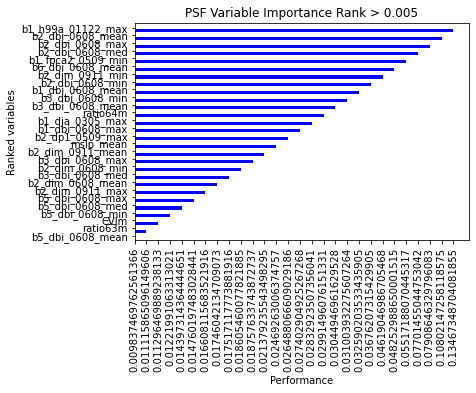

In [72]:
fi_sf_result = np.array(fi_sf_result)
score = (fi_sf_result[:,0])
band = fi_sf_result[:,1]
a = fi_sf_result[np.argsort(fi_sf_result[:, 1])]

df_sf_band = pd.DataFrame(dict(band=band,n=score))
df_sf_band['n'].astype('float')
df_sf_sort = df_sf_band.sort_values(['n'], ascending=[False])
print(df_sf_sort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
df_sf_sort2 = df_sf_band.sort_values(['n'], ascending=[True])
b = df_sf_sort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind_sf = np.arange(len(df_sf_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind_sf, df_sf_sort2.n, width, color='blue')
ax.set(yticks=ind_sf + width, yticklabels= g, ylim=[2*width - 1, len(df_sf_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title(f'PSF Variable Importance Rank > {nbfs}')


plot_out = os.path.join(model_outputs, f'PSF_{nbfs}_Band_Importance_Score_{str_model}.pdf')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

In [73]:
df_sf_sort['n'].astype('float')
df_sf_sort.info()
df_sf_sort['n'] = df_sf_sort['n'].astype('float')
df_sf_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 2 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    28 non-null     object
 1   n       28 non-null     object
dtypes: object(2)
memory usage: 672.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 2 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    28 non-null     object 
 1   n       28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 672.0+ bytes


In [74]:
# add feature importance and scores to lists
col_sf_features = df_sf_sort.band.tolist()
col_sf_features_n = df_sf_sort.n.tolist()

Ev score:  0.5344765138271763
Maximum Error:  14947.040976688779
Mean Absolute Error:  2439.610570710281
Mean Squared Error:  16121087.034454813
Root Mean Squared Error:  4015.1073503027055
Mean Squared Log Error:  16.48780631231261
Root Mean Squared Log Error :  4.060517985714705
Mean Absolute Percentage Error:  4.1120903690876933e+18
Median Absolute Error:  1081.9419057451446
Coefficient of determination:  0.5225182811754338
Bias:  -635.4067361714315
n:  51


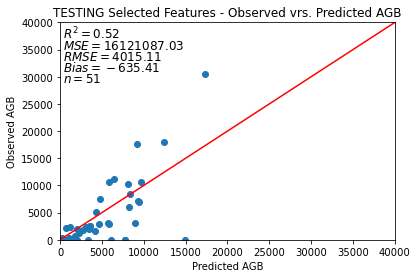

In [75]:
# predict model on test data
test_sf_predict = select_f_model_fit.predict(X_2)

# calculate metrics
test_sf_ev, test_sf_me, test_sf_mae, test_sf_mse, test_sf_rmse, test_sf_msle, test_sf_rmsle, \
test_sf_mape, test_sf_medae, test_sf_r2, test_sf_bias, test_sf_n = metrics(y_2, test_sf_predict)

plt.scatter(test_sf_predict, y_2) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('TESTING Selected Features - Observed vrs. Predicted AGB')
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {round(test_sf_r2, 2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(test_sf_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(test_sf_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(test_sf_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {test_sf_n}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_sf_test_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

### Read in unseen data

In [76]:
# select selected features and drop target
selected_unseen_data = unseen_data[column_var]
unseen_target = selected_unseen_data.target.tolist()
selected_unseen_data.drop("target", axis=1, inplace=True)

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
import math

Ev score:  0.8607547831747783
Maximum Error:  5830.38691709321
Mean Absolute Error:  1530.3971234141648
Mean Squared Error:  3877261.9643802573
Root Mean Squared Error:  1969.0764242101568
Mean Squared Log Error:  0.24941506628924384
Root Mean Squared Log Error :  0.4994147237409444
Mean Absolute Percentage Error:  0.5047089707102207
Median Absolute Error:  1385.2314842818691
Coefficient of determination:  0.8595351116423627
Bias:  -183.48481438611907
n:  22


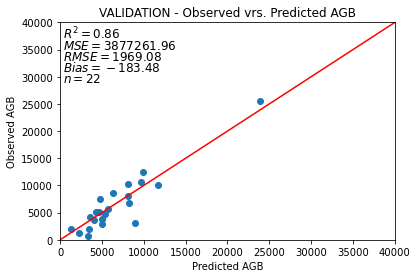

In [78]:
# predict unseen data
val_predict = select_f_model_fit.predict(selected_unseen_data)

# calculate metrics
val_ev, val_me, val_mae, val_mse, val_rmse, val_msle, val_rmsle, val_mape, val_medae, \
val_r2, val_bias, val_n = metrics(unseen_target, val_predict)

# ------------------------------ plot -----------------------------------

plt.scatter(val_predict, unseen_target) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('VALIDATION - Observed vrs. Predicted AGB')
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {round(val_r2, 2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(val_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(val_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(val_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {val_n}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_sf_validation_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

 - Explained variance (Ev score) - the proportion of the variability of the predictions in the model. The best score is 1.
 - Max Error (me) - Captures the worst case error between the predicted and actual value.
 - Mean Absolute Error (MAE) - Mean of the absolute difference between actual and predicted values.
 - Mean Squared Error (MSE) - Mean of the squared distances between actual and predicted values. Used to check how close the estimates are to the actual values.
    
   - Note: Squaring the single bad prediction, will make the error worse and skew the metric towards overestimating the model's badness.
    
   - Note: If the errors are smaller or smaller than 1, it may lead to underestimate the model's badness
    
 - Root of Mean Squared Error (MSE) or root of the mean squared distances between actual and predicted values. Higher the RMSE the larger the deviation in actual and predicted value. Lower the RMSE value the better the model is with its predictions
 
  - Note: The value of MSE is same as output unit, which makes the interpretation of loss easy.
 
  - Note: Not robust to outliers.
 
 - Mean Squared Log Error (MSLE) - a variation of Mean Squared Error. Use MSLE, when you don't want to penalize large differences between actual and predicted value.
 
 - Root Mean Squared Log Error (RMSLE) - the root of MSLE. Prefered when the targets have exponential growth. And our focus is on percentage errors rather than the absolute error.
 
 - Mean Absolute Percentage Error (MAPE) - also known as Mean Absolute Percentage Deviation (MAPD). It is sensitive to relative errors, that essentially scales Mean Absolute Deviation (MAD) to be in percentage units instead of variable's units. Commanly used for forecast accuracy.
  - Median Absolute Error (MedAE) - Median of all absolute differences between actual and predicted values.
  
  - R2 coefficient of determination - Used to measure the goodness of fit. Greater the value of R-squared, better the regression model. For the training dataset, it is bounded between 0 and 1, if SSE > SST, it can be negative for the test dataset.
  
  https://www.linkedin.com/pulse/regression-metrics-all-why-mse-aishwarya-b/

Why Mean Square Error of all metrics?

The error decreases with increase in sample size as it is normally distributed. With more experience it is less prone to errors. That's why it is preferred over other metrics.
For example,

 - If we have 100 dataset and let's say we have Sum of Squared Errors (SSE) as 200, then the error will be 200/100 = 2
 - We increase our dataset to 500 and let's say we have SSE as 800, then the error will be 800/500 = 1.6
 - Again we increase our dataset to 1000 and let's say the SSE as 1200, then the error will be 1200/1000 = 1.2

So, it's clear, increase in dataset decreases the error.
That's why of all metrics, MSE is preferred and commanly used.

### Create and export pickle file

In [79]:
import pickle

pkl_out = os.path.join(model_outputs, f'{str_model}.pkl')

with open(pkl_out, 'wb') as f:
    pickle.dump(select_f_model_fit, f)
    
print(f"Pickle file exported: {pkl_out}")

Pickle file exported: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\no0_values\rf_no0_values_n_est_116_m_feat_None_m_depth_6_20230215_081915.pkl


Ev score:  0.8607547831747783
Maximum Error:  5830.38691709321
Mean Absolute Error:  1530.3971234141648
Mean Squared Error:  3877261.9643802573
Root Mean Squared Error:  1969.0764242101568
Mean Squared Log Error:  0.24941506628924384
Root Mean Squared Log Error :  0.4994147237409444
Mean Absolute Percentage Error:  0.5047089707102207
Median Absolute Error:  1385.2314842818691
Coefficient of determination:  0.8595351116423627
Bias:  -183.48481438611907
n:  22


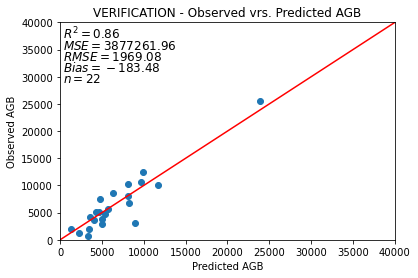

In [80]:
with open(pkl_out, 'rb') as f:
    select_f_model_fit = pickle.load(f)
    
    # fit model on unseen data
    verify_predict = select_f_model_fit.predict(selected_unseen_data)

# calculate metrics    
ver_ev, ver_me, ver_mae, ver_mse, ver_rmse, ver_msle, ver_rmsle, ver_mape, ver_medae, \
ver_r2, ver_bias, ver_n = metrics(unseen_target, verify_predict)

# ------------------------------ plot -----------------------------------

plt.scatter(verify_predict, unseen_target) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('VERIFICATION - Observed vrs. Predicted AGB')
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {round(ver_r2, 2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(ver_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(ver_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(ver_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {ver_n}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_sf_verification_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

## Add model info and metrics to table

In [81]:
# Collatemetrics into dict

data = {
       "data": model_data_name,
        #"model": str_model,
        "model": mdl,
        "n_estimator": n_est,
        "max_feature": m_feat,
        "max_depth":maxd,
        "date_time": date_time_str,
        "b_import": nbfs,
        "feature" : col_features,
        "feat_score": col_features_n,
       "pickle": pkl_out,
        "num_f_sel": num_bf_selection,
        "train_ev": train_ev,
       "train_me": train_me,
       "train_mae": train_mae,
       "train_mse": train_mse,
       "train_rmse": train_rmse,
       "train_msle": train_msle,
       "train_rmsle": train_rmsle,
       "train_mape": train_mape,
       "train_medae": train_medae,
       "train_r2": train_r2,
       "train_bias": train_bias,
       "train_n": train_n,
        
       "test_ev": test_ev,
       "test_me": test_me,
       "test_mae": test_mae,
       "test_mse": test_mse,
       "test_rmse": test_rmse,
       "test_msle": test_msle,
       "test_rmsle": test_rmsle,
       "test_mape": test_mape,
       "test_medae": test_medae,
       "test_r2": test_r2,
       "test_bias": test_bias,
       "test_n": test_n,
        "sf_feature" : col_sf_features,
        "sf_feat_score": col_sf_features_n,
        
       "test_sf_ev": test_sf_ev,
       "test_sf_me": test_sf_me,
       "test_sf_mae": test_sf_mae,
       "test_sf_mse": test_sf_mse,
       "test_sf_rmse": test_sf_rmse,
       "test_sf_msle": test_sf_msle,
       "test_sf_rmsle": test_sf_rmsle,
       "test_sf_mape": test_sf_mape,
       "test_sf_medae": test_sf_medae,
       "test_sf_r2": test_sf_r2,
       "test_sf_bias": test_sf_bias,
       "test_sf_n": test_sf_n,
        
        "val_ev": val_ev,
       "val_me": val_me,
       "val_mae": val_mae,
       "val_mse": val_mse,
       "val_rmse": val_rmse,
       "val_msle": val_msle,
       "val_rmsle": val_rmsle,
       "val_mape": val_mape,
       "val_medae": val_medae,
       "val_r2": val_r2,
       "val_bias": val_bias,
       "val_n": val_n,
    
       "ver_ev": ver_ev,
       "ver_me": ver_me,
       "ver_mae": ver_mae,
       "ver_mse": ver_mse,
       "ver_rmse": ver_rmse,
       "ver_msle": ver_msle,
       "ver_rmsle": ver_rmsle,
       "ver_mape": ver_mape,
       "ver_medae": ver_medae,
       "ver_r2": ver_r2,
       "ver_bias": ver_bias,
       "ver_n": ver_n,
       }




In [82]:
# create and export dataframe with metrics
df_out = pd.DataFrame(data)
out_path = os.path.join(output_ml_csv, f"{str_model}_score.csv")
df_out.to_csv(out_path, index=False)
print(out_path)

D:\cdu\data\ml_outputs\rf_no0_values_n_est_116_m_feat_None_m_depth_6_20230215_081915_score.csv
